<a href="https://colab.research.google.com/github/luoChengwen/Accelerometer_integration/blob/master/Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://www.kaggle.com/c/titanic

In [0]:
# !pip install tensorflow==2.0.0-beta0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder

In [0]:
# train = files.upload()
# test = files.upload()

In [0]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [204]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [205]:
print(train.describe())


       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


In [206]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [207]:
train.drop(columns='Cabin',inplace=True)

print(train.head(3))

   PassengerId  Survived  Pclass  ...            Ticket     Fare  Embarked
0            1         0       3  ...         A/5 21171   7.2500         S
1            2         1       1  ...          PC 17599  71.2833         C
2            3         1       3  ...  STON/O2. 3101282   7.9250         S

[3 rows x 11 columns]


In [272]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lex = le.fit(train['Sex'])

print(lex.classes_)
train['Sex']= lex.transform(train['Sex'])
test['Sex']= lex.transform(test['Sex'])
print(train.head(3))

['female' 'male']
   PassengerId  Survived  Pclass  ...     Fare  Cabin  Embarked
0            1         0       3  ...   7.2500    NaN         S
1            2         1       1  ...  71.2833    C85         C
2            3         1       3  ...   7.9250    NaN         S

[3 rows x 12 columns]


In [209]:
pd.crosstab(train.Embarked,train.Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [0]:
train['Embarked'] = train['Embarked'].fillna('S')
lee = le.fit(train['Embarked']) 
train['Embarked']= lee.transform(train['Embarked'])
test['Embarked']= lee.transform(test['Embarked'])
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]


In [211]:
print(lee.classes_)

['C' 'Q' 'S']


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


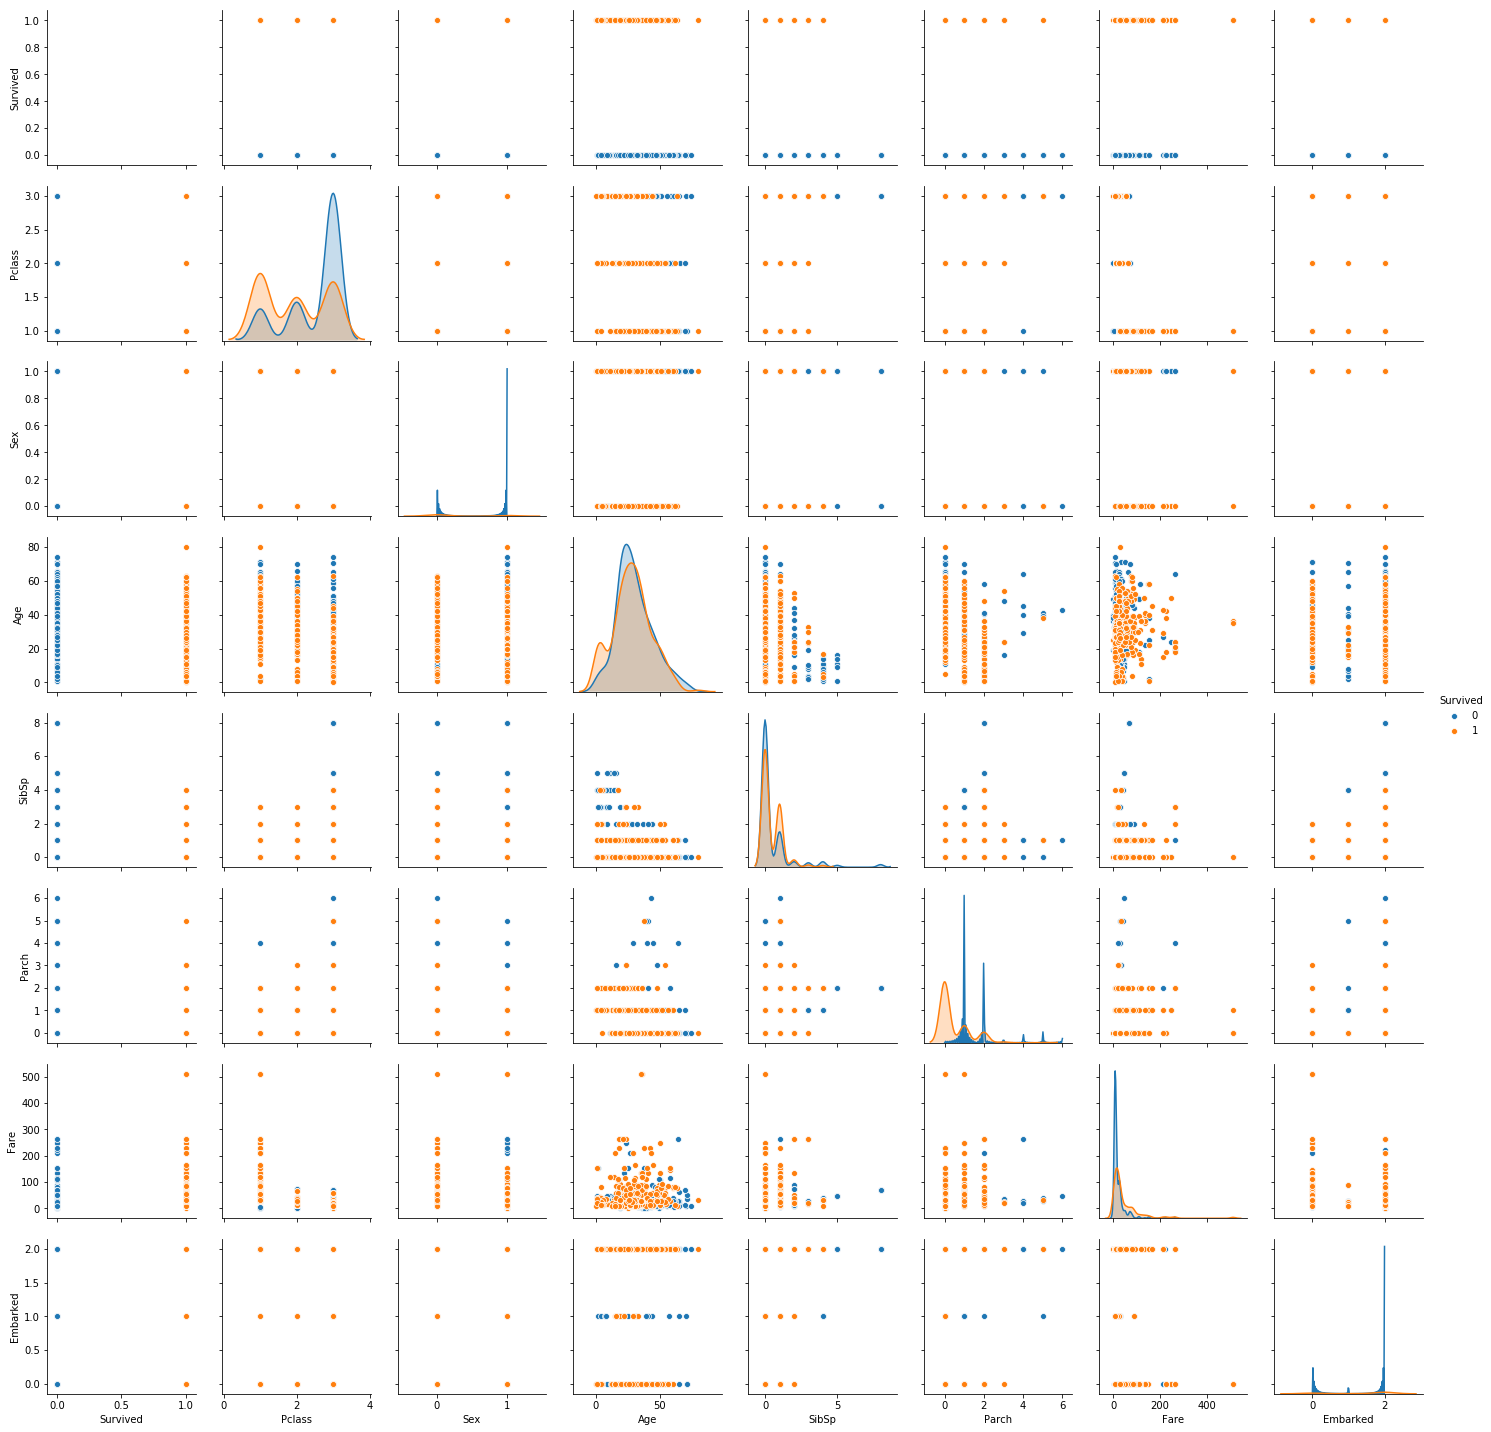

In [212]:
import seaborn as sb
sb.pairplot(train, hue = 'Survived')

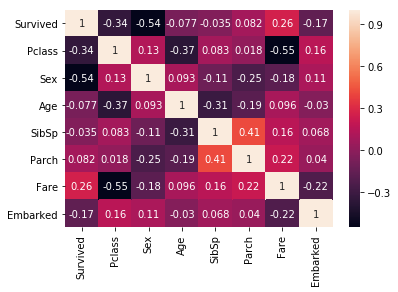

In [213]:
sb.heatmap(train.corr(),annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


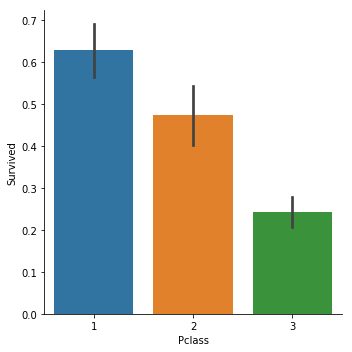

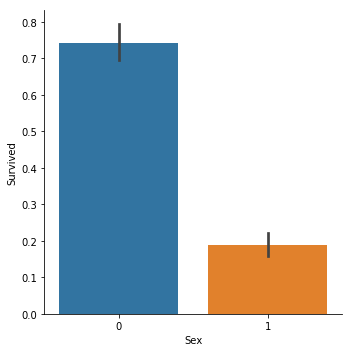

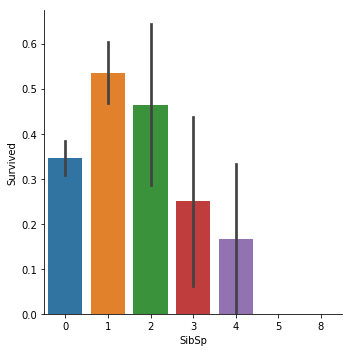

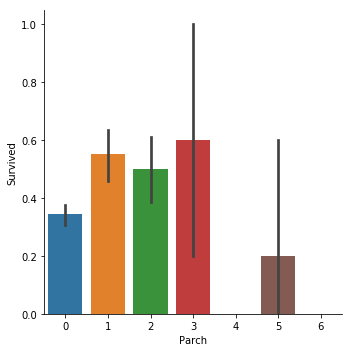

In [214]:
for i in['Pclass','Sex','SibSp','Parch']:
    sb.factorplot(y='Survived', x = i, kind='bar', data=train)


In [277]:

train.Age.fillna(train.Age.mean(), inplace=True)
print(train.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [278]:

final_train = train
final_train.head(4)
final_train = final_train[['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp','Survived']]
print(final_train.isnull().sum())

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64


In [279]:
learning_rate = np.logspace(-5,5,10)
max_depth = np.arange(4,7)
num_parallel_tree = np.arange(1,5)
grid_para = dict(learning_rate = learning_rate, max_depth= max_depth, num_parallel_tree = num_parallel_tree)
model_cv = GridSearchCV(XGBClassifier(),grid_para)
X = final_train.drop(columns=['Survived'])
y = final_train[['Survived']]
model_cv.fit(X,y)
print(model_cv.best_score_)
print(model_cv.best_params_)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8260381593714927
{'learning_rate': 0.021544346900318846, 'max_depth': 6, 'num_parallel_tree': 1}


In [280]:
print(X.isnull().sum())

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
dtype: int64


In [281]:
from sklearn.metrics import confusion_matrix
np.random.seed(6)
clf_f = XGBClassifier(learning_rate = model_cv.best_params_['learning_rate'], max_depth = model_cv.best_params_['max_depth'], num_parallel_tree =  model_cv.best_params_['num_parallel_tree'])
clf_f.fit(X,y)
ypre = clf_f.predict(X)
print(confusion_matrix(y,ypre))
print(clf_f.score(X,y))





[[518  31]
 [ 77 265]]
0.8787878787878788


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:

test_id = test[['PassengerId']]
test = test[['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']]



In [0]:
# test.columns

In [0]:
y_pred = clf_f.predict(test)

In [285]:
print(len(y_pred))
pd.concat([test_id,pd.DataFrame(y_pred,columns=['Survived'])],axis=1).to_csv('/content/submission.csv',index=False)

418


## The above results yield 77.75% accuracy in Kaggle leaderboard, 5000ish rank ~

# attempt 2: stacking

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
import warnings
warnings.simplefilter('ignore')


In [305]:
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier(max_depth=6)
clf3 = XGBClassifier()
mec = LogisticRegression()

clf_f = StackingClassifier(classifiers=[clf1,clf2,clf3], meta_classifier = mec )

X.isnull().sum()



Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
dtype: int64

In [306]:
for clf, label in zip([clf1,clf2,clf3,clf_f], ['KNN','Random Forest','XGB','stakcing Classifier1']):
                      scores = model_selection.cross_val_score(clf,X,y, cv=4, scoring = 'accuracy')
                      print(np.round(scores.mean(),3),np.round(scores.std(),3),label)

0.691 0.017 KNN
0.809 0.038 Random Forest
0.81 0.026 XGB
0.807 0.041 stakcing Classifier1


In [307]:
clf_f.fit(X,y)


StackingClassifier(average_probas=False,
                   classifiers=[KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=5,
                                                     p=2, weights='uniform'),
                                RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=6,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0

In [308]:

test = test.fillna(test.Fare.mean())
y2 = clf_f.predict(test)
print(len(y2))
pd.concat([test_id,pd.DataFrame(y2,columns=['Survived'])],axis=1).to_csv('/content/submission_stack1.csv',index=False)
print(test.isnull().sum())

418
Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
dtype: int64


## 0.76555 kaggle leaderboard accuracy